In [87]:
import matplotlib.lines as mlines
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import glob


warnings.filterwarnings('ignore')


In [88]:
def plot_runtime_analysis(df):
    """
    Creates a two-column matrix of subplots for runtime analysis,
    plotting each dataset in a subplot.

    Parameters:
    - df: pd.DataFrame, with columns: 
        'usecase' (dataset), 'matcher', 'target_sample', 'avg_runtime'
    """
    import math
    
    # Get unique datasets
    datasets = df['usecase'].unique()
    n_datasets = len(datasets)

    # Calculate number of rows for a two-column layout
    n_rows = math.ceil(n_datasets / 2)

    # Create subplots
    fig, axes = plt.subplots(n_rows, 2, figsize=(9, 3 * n_rows), sharex=False, sharey=False)

    # Flatten axes for easier iteration
    axes = axes.flatten()

    # Define palette for matchers
    palette = sns.color_palette("pastel", n_colors=len(df['matcher'].unique()))

    # Plot each dataset
    for i, dataset in enumerate(datasets):
        ax = axes[i]

        # Filter data for the current dataset
        df_subset = df[df['usecase'] == dataset]

        # Lineplot for each matcher
        sns.lineplot(
            data=df_subset,
            x='target_sample',
            y='avg_runtime',
            palette=palette,
            hue='matcher',
            marker='o',
            ax=ax
        )

        # Customize the subplot
        ax.set_title(f"{dataset}", fontsize=14)
        ax.set_xlabel("Number of Columns in Target Table", fontsize=12)
        ax.set_ylabel("Runtime (s)", fontsize=12)

        # Legend handling for first subplot only
        if i == 0:
            ax.legend(loc='upper right', frameon=False)
        else:
            ax.get_legend().remove()

    # Remove empty subplots if the number of datasets is odd
    for j in range(len(datasets), len(axes)):
        fig.delaxes(axes[j])

    # Final adjustments
    sns.despine()
    plt.tight_layout()
    plt.savefig('figures/runtime_analysis.pdf', dpi=300, bbox_inches='tight')
    plt.show()


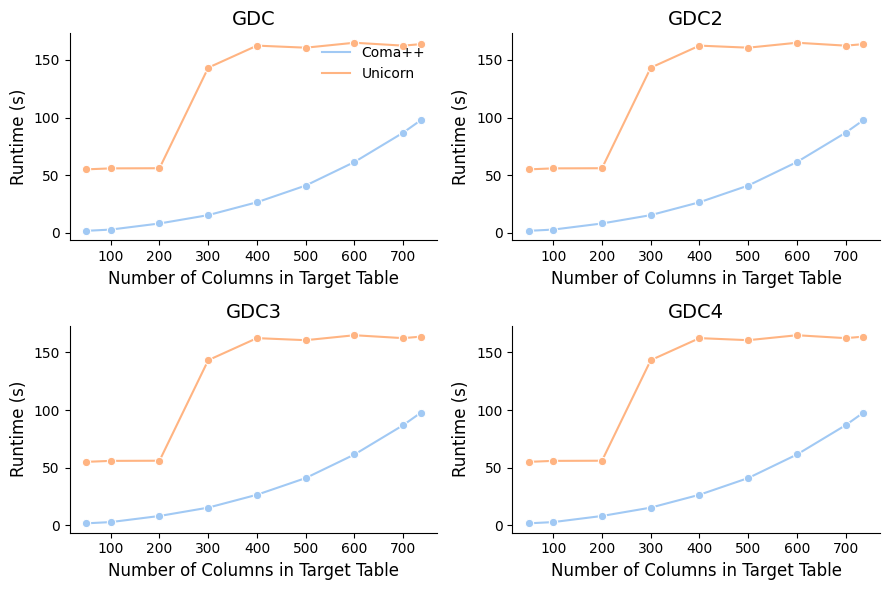

In [89]:
main_path = 'server_results/scalability/'
df_path = main_path + 'target_sample_df.csv'
df = pd.read_csv(df_path)

df['avg_runtime'] = df['avg_runtime'] / 1000



plot_runtime_analysis(df)